In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_ta as ta

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

dfs = []

for dirname, _, filenames in os.walk("data/tsla-options-data-2019-2022"):
    for filename in filenames:
        data_path = os.path.join(dirname, filename)
        print(data_path)
        dfs.append(pd.read_csv(data_path, low_memory=False))

df_raw = pd.concat(dfs)
columns = df_raw.columns
columns = [s.replace("[", "") for s in columns]
columns = [s.replace("]", "") for s in columns]
columns = [s.replace(" ", "") for s in columns]
df_raw.columns = columns
df_raw

data/tsla-options-data-2019-2022/tsla_2019_2022.csv


,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_SIZE,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_SIZE,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1556740800,2019-05-01 16:00,2019-05-01,16.0,233.98,2019-05-03,1556913600,2.0,0.984650,0.000550,0.007520,-0.343200,0.009040,3.383060,1.000000,102.610000,30 x 30,103.600000,105.200000,130.0,0.000000,0.020000,0 x 344,0.010000,-0.000710,0.000030,0.000460,-0.009750,0.000000,2.225480,147.000000,104.0,0.444
1,1556740800,2019-05-01 16:00,2019-05-01,16.0,233.98,2019-05-03,1556913600,2.0,0.983710,0.000670,0.008120,-0.342360,0.009890,3.189620,,0.000000,52 x 52,98.410000,100.390000,135.0,0.000000,0.030000,0 x 200,0.020000,-0.001090,0.000090,0.000580,-0.010100,-0.000010,2.083490,12.000000,99.0,0.423
2,1556740800,2019-05-01 16:00,2019-05-01,16.0,233.98,2019-05-03,1556913600,2.0,0.984580,0.000690,0.008080,-0.284780,0.010440,2.910250,1.000000,130.200000,30 x 10,93.450000,95.200000,140.0,0.010000,0.030000,250 x 64,0.020000,-0.001220,0.000120,0.001130,-0.014350,0.000000,2.023590,15.000000,94.0,0.402
3,1556740800,2019-05-01 16:00,2019-05-01,16.0,233.98,2019-05-03,1556913600,2.0,0.991870,0.000490,0.005030,-0.126420,0.011070,2.415820,,0.000000,30 x 30,87.700000,90.550000,145.0,0.010000,0.030000,250 x 20,0.010000,-0.001340,0.000090,0.001390,-0.014650,0.000000,1.895040,0.000000,89.0,0.380
4,1556740800,2019-05-01 16:00,2019-05-01,16.0,233.98,2019-05-03,1556913600,2.0,0.993410,0.000390,0.003150,-0.083380,0.010800,2.141030,,0.000000,10 x 10,82.950000,85.190000,150.0,0.010000,0.020000,250 x 85,0.010000,-0.001760,0.000080,0.001050,-0.014670,0.000000,1.768120,91.000000,84.0,0.359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659254,1567195200,2019-08-30 16:00,2019-08-30,16.0,225.60,2021-06-18,1624046400,658.0,0.183030,0.002020,0.795640,-0.024170,0.543830,0.431590,1.000000,11.650000,52 x 44,8.490000,11.990000,430.0,209.290000,213.910000,1 x 68,0.000000,-0.965400,0.000000,0.000000,-0.011600,-7.753380,0.000040,,204.4,0.906
2659255,1567195200,2019-08-30 16:00,2019-08-30,16.0,225.60,2021-06-18,1624046400,658.0,0.178260,0.001930,0.781770,-0.023200,0.530840,0.431900,2.000000,11.250000,52 x 62,8.090000,11.750000,435.0,213.700000,218.400000,1 x 62,0.000000,-0.965240,0.000000,0.000000,-0.011450,-7.843780,0.000220,,209.4,0.928
2659256,1567195200,2019-08-30 16:00,2019-08-30,16.0,225.60,2021-06-18,1624046400,658.0,0.179540,0.001920,0.785610,-0.023590,0.532290,0.439520,2.000000,11.000000,39 x 34,8.000000,12.300000,440.0,218.290000,222.900000,2 x 22,0.000000,-0.965650,0.000000,0.000000,-0.011900,-7.934310,0.000300,,214.4,0.950
2659257,1567195200,2019-08-30 16:00,2019-08-30,16.0,225.60,2021-06-18,1624046400,658.0,0.162070,0.001910,0.736380,-0.022300,0.489890,0.425440,,0.000000,39 x 25,7.300000,10.200000,445.0,222.700000,227.400000,1 x 21,0.000000,-1.000000,0.000000,77.279150,0.000000,0.000000,0.000370,,219.4,0.973


In [2]:
# df_raw.info()

In [3]:
date_columns = ["QUOTE_READTIME", "QUOTE_DATE", "EXPIRE_DATE"]
numeric_cols = df_raw.columns.to_list()
numeric_cols.remove("QUOTE_READTIME")
numeric_cols.remove("QUOTE_DATE")
numeric_cols.remove("EXPIRE_DATE")

df_numeric = df_raw.drop(columns=date_columns)

for i in numeric_cols:
    df_numeric[i] = pd.to_numeric(df_numeric[i], errors="coerce")

df_final = df_numeric.drop(columns=["C_SIZE", "P_SIZE"])
# df_final = df_final.drop(columns=date_columns)
# df_final.info()

In [4]:
# df_final.hist(column="DTE", bins=100)

### As we can see, there is a heavy skew towards shorter contracts in this dataset. 

In order to use this data for a viable trading strategy, we may want to consider truncating some longer duration contracts. The strategy proposed by https://tastytrade.com/, an options trading brokerage, recommends staying in the 45-60 day range when using the majority of trading strategies. We will explore the statistical backing behind this recommendation.

P.S. - I have no affiliation with TastyTrade, just a fan of their work and free learning materials!

In [5]:
# pd.DataFrame(df_final.DTE.value_counts()).head(20)
# df_final

Text(0.5, 1.0, 'AAPL Stock Price - 2021 to 2023')

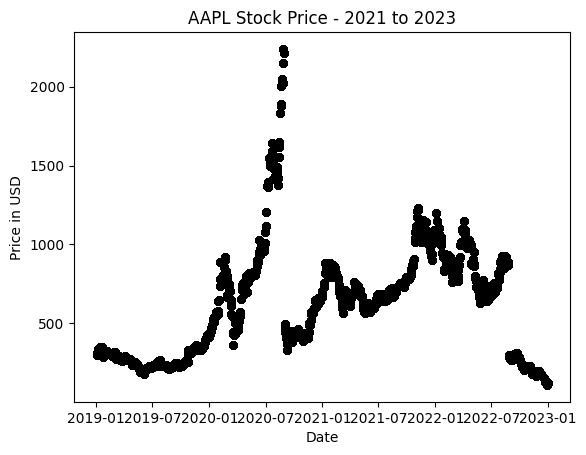

In [6]:
plt.scatter(
    pd.to_datetime(df_numeric["QUOTE_UNIXTIME"], unit="s"), df_numeric["UNDERLYING_LAST"], color="black", alpha=0.003
)
plt.ylabel("Price in USD")
plt.xlabel("Date")
plt.title("AAPL Stock Price - 2021 to 2023")

In [8]:
df_option_history = df_final.copy()

df_option_history["EXPIRE_UNIX"] = pd.to_datetime(df_option_history.EXPIRE_UNIX, unit="s", utc=True)
df_option_history["QUOTE_UNIXTIME"] = pd.to_datetime(df_option_history.QUOTE_UNIXTIME, unit="s", utc=True).apply(
    lambda x: pd.Timestamp(x).round(freq="D")
)

df_option_history.set_index(pd.DatetimeIndex(df_option_history.QUOTE_UNIXTIME), inplace=True)
df_option_history.sort_index(inplace=True)
df_option_history.drop(columns=["QUOTE_UNIXTIME"], inplace=True)

df_option_history["OPTION_ID"] = df_option_history["EXPIRE_UNIX"].astype(str) + df_option_history["STRIKE"].astype(str)
df_option_history["OPTION_ID"] = df_option_history["OPTION_ID"].apply(lambda x: hash(x))


def get_df_cnn_fear_greed_index():
    print("Retrieving historical ETF fear and greed index")
    import json

    with open("cnn_fear_greed_index_data.json") as f:
        cnn_fear_greed_index_data = json.load(f)

    df_fear_greed_index = pd.DataFrame(
        data=cnn_fear_greed_index_data["data"]["c:50108"]["series"][0], columns=["x", "y"]
    )
    df_fear_greed_index.set_index(
        pd.DatetimeIndex([pd.Timestamp(x, unit="s", tz="UTC") for x in df_fear_greed_index.x]),
        inplace=True,
    )
    df_fear_greed_index.rename(columns={"y": "fear_greed_index"}, inplace=True)
    return df_fear_greed_index


df_fear_greed_index = get_df_cnn_fear_greed_index()
df_option_history = df_option_history.join(df_fear_greed_index[["fear_greed_index"]], how="inner")
df_option_history["fear_greed_index"] = df_option_history.fear_greed_index.fillna(method="ffill").astype(float)

df_history = df_option_history.groupby(df_option_history.index).first()[["UNDERLYING_LAST", "fear_greed_index"]]
# df_history = df_option_history.groupby(df_option_history.index).first()[["UNDERLYING_LAST"]]
df_history.rename(columns={"UNDERLYING_LAST": "close"}, inplace=True)

CustomStrategy = ta.Strategy(
    name="RSI",
    ta=[
        {"kind": "rsi", "length": 14},
    ],
)
df_history.ta.strategy(CustomStrategy)

for column in ["close", "fear_greed_index", "RSI_14"]:
    for days in [14]:
        periods = days
        df_history[f"{column}_min_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).min()
        df_history[f"{column}_max_{days}"] = df_history[column].rolling(window=periods, min_periods=periods).max()

# df_option_history = df_option_history.join(df_history, how="inner")
df_option_history = df_option_history.join(df_history.drop(columns=["fear_greed_index"]), how="inner")

df_option_history

Retrieving historical ETF fear and greed index


/tmp/ipykernel_71551/2040824419.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_option_history["fear_greed_index"] = df_option_history.fear_greed_index.fillna(method="ffill").astype(float)


,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID,fear_greed_index,close,RSI_14,close_min_14,close_max_14,fear_greed_index_min_14,fear_greed_index_max_14,RSI_14_min_14,RSI_14_max_14
2021-05-18 00:00:00+00:00,16.0,576.66,2022-01-21 21:00:00+00:00,249.04,0.97505,0.00017,0.27365,-0.04343,1.22099,0.79036,1.0,444.20,382.70,385.56,197.0,3.66,4.04,7.18,-0.02216,0.00013,0.25344,-0.03889,-0.11247,0.76720,6.0,379.7,0.658,-1029008990662803362,34.8333,576.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,576.66,2022-01-21 21:00:00+00:00,249.04,0.97537,0.00016,0.27734,-0.04331,1.22653,0.78969,2.0,442.90,381.80,384.60,198.0,3.70,4.11,3.05,-0.02245,0.00012,0.25592,-0.03898,-0.11404,0.76657,1.0,378.7,0.657,-4123225170653519105,34.8333,576.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,576.66,2022-01-21 21:00:00+00:00,249.04,0.97471,0.00012,0.28005,-0.04405,1.23111,0.78775,3.0,436.60,380.85,383.65,199.0,3.75,4.14,3.55,-0.02326,0.00016,0.25946,-0.03993,-0.11577,0.76479,10.0,377.7,0.655,-7928349886651355755,34.8333,576.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,576.66,2022-01-21 21:00:00+00:00,249.04,0.97423,0.00012,0.28232,-0.04426,1.23673,0.78655,0.0,387.00,379.90,382.70,200.0,4.00,4.20,4.10,-0.02328,0.00019,0.26573,-0.04022,-0.11901,0.76698,93.0,376.7,0.653,-73597790216458040,34.8333,576.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-18 00:00:00+00:00,16.0,576.66,2022-01-21 21:00:00+00:00,249.04,0.97323,0.00018,0.29054,-0.04619,1.23886,0.79068,6.0,432.00,379.15,381.90,201.0,3.95,4.25,5.30,-0.02346,0.00015,0.26631,-0.04095,-0.12012,0.76358,1.0,375.7,0.651,-494394743665303229,34.8333,576.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 00:00:00+00:00,16.0,123.19,2023-02-03 21:00:00+00:00,35.00,0.03784,0.00240,0.03129,-0.03840,0.00373,0.88234,12.0,0.45,0.39,0.54,210.0,85.85,88.45,88.40,-0.83244,0.00117,0.07562,-0.12035,-0.06073,1.20496,0.0,86.8,0.705,-4446317710602555674,38.3143,123.19,29.643536,109.08,167.73,35.5143,60.9429,16.210198,33.712612
2022-12-31 00:00:00+00:00,16.0,123.19,2023-02-03 21:00:00+00:00,35.00,0.04371,0.00275,0.03581,-0.04310,0.00488,0.87463,31.0,0.55,0.46,0.63,205.0,80.90,83.50,93.35,-0.83949,0.00139,0.07476,-0.11242,-0.06014,1.14819,0.0,81.8,0.664,-4917216189872509825,38.3143,123.19,29.643536,109.08,167.73,35.5143,60.9429,16.210198,33.712612
2022-12-31 00:00:00+00:00,16.0,123.19,2023-02-03 21:00:00+00:00,35.00,0.04948,0.00308,0.03929,-0.04763,0.00506,0.86178,87.0,0.64,0.55,0.70,200.0,76.50,78.35,79.10,-0.84155,0.00190,0.07620,-0.11035,-0.06302,1.11572,71.0,76.8,0.624,-3567517004621485715,38.3143,123.19,29.643536,109.08,167.73,35.5143,60.9429,16.210198,33.712612
2022-12-31 00:00:00+00:00,16.0,123.19,2023-02-03 21:00:00+00:00,35.00,0.06943,0.00411,0.05147,-0.06126,0.00786,0.84961,91.0,0.89,0.85,0.96,190.0,66.20,68.60,68.20,-0.85647,0.00240,0.07256,-0.09229,-0.06116,0.98790,1.0,66.8,0.542,4147535859888847929,38.3143,123.19,29.643536,109.08,167.73,35.5143,60.9429,16.210198,33.712612


In [9]:
df_option_history.describe()

,QUOTE_TIME_HOURS,UNDERLYING_LAST,DTE,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,C_IV,C_VOLUME,C_LAST,C_BID,C_ASK,STRIKE,P_BID,P_ASK,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT,OPTION_ID,fear_greed_index,close,RSI_14,close_min_14,close_max_14,fear_greed_index_min_14,fear_greed_index_max_14,RSI_14_min_14,RSI_14_max_14
count,913057.0,913057.000000,913057.000000,912658.000000,912658.000000,912658.000000,912658.000000,912658.000000,864695.000000,839750.000000,912129.000000,912129.000000,912129.000000,913057.000000,912129.000000,912129.000000,912129.000000,912658.000000,912658.000000,912658.000000,912658.000000,912658.000000,847410.000000,794926.000000,913057.000000,913057.000000,9.130570e+05,913057.000000,913057.000000,868779.000000,871878.000000,871878.00000,871878.000000,871878.000000,830000.000000,830000.000000
mean,16.0,726.041011,173.260412,0.552152,0.001137,0.700637,-0.261614,1.023105,0.858506,99.049073,193.859505,215.053409,218.731593,737.456533,222.576513,225.735035,151.911975,-0.417310,0.001197,-4.842058,-0.285861,-1.293268,0.984480,98.743970,388.265435,0.571811,1.531552e+17,38.909745,726.041011,49.260437,658.682297,820.21343,25.336792,52.335989,39.691177,59.323517
std,0.0,280.634958,196.136301,0.388190,0.003350,15.688018,0.687757,15.245880,0.833539,1166.025179,261.790231,264.014356,266.630440,558.894405,338.006671,340.707873,275.097127,0.359252,0.077521,194.402687,0.486124,2.750461,0.924724,1100.028486,339.157377,0.515535,5.352449e+18,16.524718,280.634958,16.034168,244.345138,300.92910,13.740311,14.356205,13.178121,16.546684
min,16.0,109.080000,0.000000,0.000000,-0.000040,-4404.179760,-232.430290,-5062.504430,-0.000500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-0.000040,-15001.900470,-28.874010,-226.427330,-0.000500,0.000000,0.000000,0.000000,-9.223271e+18,4.028600,109.080000,16.118591,109.080000,167.73000,4.028600,22.400000,16.118591,23.641543
25%,16.0,631.130000,25.000000,0.131883,0.000090,0.051030,-0.310800,0.049840,0.591920,0.000000,3.050000,8.850000,9.550000,294.000000,3.500000,4.200000,0.560000,-0.752950,0.000040,0.058860,-0.359550,-1.194520,0.602510,0.000000,118.000000,0.198000,-4.457894e+18,26.542900,631.130000,38.914074,616.000000,688.47000,16.928600,41.433300,31.936176,47.932280
50%,16.0,744.620000,94.000000,0.615000,0.000490,0.352570,-0.129370,0.327630,0.664490,2.000000,64.150000,92.700000,95.950000,640.000000,65.100000,67.400000,23.150000,-0.385990,0.000360,0.422120,-0.153790,-0.219250,0.706360,2.000000,292.400000,0.461000,2.646320e+17,37.233300,744.620000,50.304488,699.370000,842.79000,20.600000,52.400000,37.958294,64.566715
75%,16.0,922.170000,249.040000,0.959607,0.001300,1.103530,-0.036170,1.154460,0.855305,13.000000,304.020000,351.550000,357.900000,1040.000000,294.660000,299.750000,171.000000,-0.032650,0.001180,1.205538,-0.031970,-0.013640,1.019930,14.000000,577.900000,0.819000,4.826930e+18,52.085700,922.170000,60.620387,829.100000,1057.46000,31.833300,64.257100,50.713784,69.326812
max,16.0,1229.730000,858.040000,1.000000,1.304670,17.197080,0.000000,1013.667890,62.756140,134688.000000,1477.260000,1226.050000,1238.500000,2475.000000,1846.850000,1858.000000,1838.510000,0.000000,55.157620,110.155190,0.000000,0.000000,37.407940,146527.000000,1846.500000,6.563000,9.222844e+18,77.171400,1229.730000,93.327776,1030.500000,1229.73000,62.771400,77.171400,72.167998,93.327776


In [11]:
money = 100000
start_money = money
owned_options = []
last_index = df_option_history.index.values[-1]

for index, row in df_option_history.iterrows():
    index_date = index.strftime(format="%Y-%m-%d")
    is_last_index = index.to_numpy() == last_index

    max_buy_price = money / 10
    call_ask_price = row.C_ASK * 100
    call_bid_price = row.C_BID * 100
    put_ask_price = row.P_ASK * 100
    put_bid_price = row.P_BID * 100

    owned_options_not_sold = []

    good_call_buy = row.fear_greed_index == row.fear_greed_index_max_14
    good_put_buy = row.fear_greed_index == row.fear_greed_index_min_14

    for option in owned_options:
        if option["OPTION_ID"] == row.OPTION_ID:
            if option["side"] == "call" and (
                (option["DTE"] - row.DTE) > 7
                or row.DTE < 7
                # or option["C_ASK"] < row.C_BID
                or not good_call_buy
                or is_last_index
            ):
                money += call_bid_price
                print(f"{index_date} ${money:.2f} {len(owned_options)} sell call {row.OPTION_ID} ${call_bid_price:.2f}")
            elif option["side"] == "put" and (
                (option["DTE"] - row.DTE) > 7
                or row.DTE < 7
                # or option["P_ASK"] < row.P_BID
                or not good_put_buy
                or is_last_index
            ):
                money += put_bid_price
                print(f"{index_date} ${money:.2f} {len(owned_options)} sell put {row.OPTION_ID} ${put_bid_price:.2f}")
            else:
                owned_options_not_sold.append(option)
        else:
            owned_options_not_sold.append(option)

    owned_options = owned_options_not_sold

    if not is_last_index:
        if (
            good_call_buy
            and row.DTE > 14
            # and row.DTE < 30
            and row.C_VOLUME > 10
            and row.STRIKE_DISTANCE_PCT < 0.1
            # and row.STRIKE < row.UNDERLYING_LAST
            # and call_ask_price > 10
            and call_ask_price <= max_buy_price
            and money >= call_ask_price
            and len([x for x in owned_options if x["side"] == "call" and x["purchase_date"] == index_date]) == 0
        ):
            money -= call_ask_price
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "call"
            option_to_buy["purchase_date"] = index_date
            owned_options.append(option_to_buy)
            print(f"{index_date} ${money:.2f} {len(owned_options)} buy call {row.OPTION_ID} ${call_ask_price:.2f}")
        elif (
            good_put_buy
            and row.DTE > 14
            # and row.DTE < 30
            and row.P_VOLUME > 10
            and row.STRIKE_DISTANCE_PCT < 0.1
            # and row.STRIKE > row.UNDERLYING_LAST
            # and put_ask_price > 10
            and put_ask_price <= max_buy_price
            and money >= put_ask_price
            and len([x for x in owned_options if x["side"] == "put" and x["purchase_date"] == index_date]) == 0
        ):
            money -= put_ask_price
            option_to_buy = row.to_dict()
            option_to_buy["side"] = "put"
            option_to_buy["purchase_date"] = index_date
            owned_options.append(option_to_buy)
            print(f"{index_date} ${money:.2f} {len(owned_options)} buy put {row.OPTION_ID} ${put_ask_price:.2f}")

print(f"Start money: ${start_money:.2f}")
print(f"End money: ${money:.2f} ({(money-start_money)/start_money*100:.2f}%)")

2021-06-10 $91245.00 1 buy call 7264669956452233514 $8755.00
2021-06-11 $83284.00 2 buy call 1436994870518567846 $7961.00
2021-06-15 $92455.00 2 sell call 7264669956452233514 $9171.00
2021-06-15 $100419.00 1 sell call 1436994870518567846 $7964.00
2021-07-08 $92159.00 1 buy put -3052660514438330776 $8260.00
2021-07-09 $100179.00 1 sell put -3052660514438330776 $8020.00
2021-07-15 $93024.00 1 buy put 4993852921774327050 $7155.00
2021-07-16 $86064.00 2 buy put 4993852921774327050 $6960.00
2021-07-20 $79134.00 3 buy put 4993852921774327050 $6930.00
2021-07-21 $85294.00 3 sell put 4993852921774327050 $6160.00
2021-07-21 $91454.00 3 sell put 4993852921774327050 $6160.00
2021-07-21 $97614.00 3 sell put 4993852921774327050 $6160.00
2021-08-05 $87948.00 1 buy call 2061218290254594056 $9666.00
2021-08-06 $84378.00 2 buy call -2059314911417067471 $3570.00
2021-08-10 $76503.00 3 buy call -7528109778981612187 $7875.00
2021-08-11 $69169.00 4 buy call 3588831896564284012 $7334.00
2021-08-12 $64084.00